In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv(r"C:\Users\ansik\Downloads\archive (22)\car details v4.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [54]:
#df.head(10)

In [55]:
df["Engine"].value_counts() 

Engine
1197 cc    231
1248 cc    122
998 cc     121
1497 cc     84
1995 cc     82
          ... 
2157 cc      1
936 cc       1
2400 cc      1
793 cc       1
995 cc       1
Name: count, Length: 108, dtype: int64

In [56]:
df["Max Power"].value_counts()

Max Power
89 bhp @ 4000 rpm     90
82 bhp @ 6000 rpm     62
126 bhp @ 4000 rpm    55
83 bhp @ 6000 rpm     55
74 bhp @ 4000 rpm     50
                      ..
198@4000               1
247 bhp @ 5500 rpm     1
197 bhp @ 5000 rpm     1
70 bhp @ 4000 rpm      1
329 bhp @ 5250 rpm     1
Name: count, Length: 335, dtype: int64

In [57]:
df["Max Torque"].value_counts()

Max Torque
200 Nm @ 1750 rpm    90
115 Nm @ 4000 rpm    78
114 Nm @ 4000 rpm    66
90 Nm @ 3500 rpm     64
400 Nm @ 1750 rpm    63
                     ..
500@1500              1
150 Nm @ 1750 rpm     1
300 Nm @ 1300 rpm     1
113 Nm @ 5000 rpm     1
480 Nm @ 1600 rpm     1
Name: count, Length: 290, dtype: int64

In [58]:
df["Drivetrain"].value_counts()

Drivetrain
FWD    1330
RWD     321
AWD     272
Name: count, dtype: int64

# Handling Missing values

In [59]:
df["Engine"]=df["Engine"].fillna("1197cc")
df["Max Power"]=df["Max Power"].fillna("89 bhp @ 4000 rpm")
df["Max Torque"]=df["Max Torque"].fillna("200 Nm @ 1750 rpm ")
df["Drivetrain"]=df["Drivetrain"].fillna("FWD")

In [60]:
df["Length"]=df["Length"].fillna(np.mean(df["Length"]))
df["Width"]=df["Width"].fillna(np.mean(df["Width"]))
df["Height"]=df["Height"].fillna(np.mean(df["Height"]))
df["Seating Capacity"]=df["Seating Capacity"].fillna(np.mean(df["Seating Capacity"]))
df["Fuel Tank Capacity"]=df["Fuel Tank Capacity"].fillna(np.mean(df["Fuel Tank Capacity"]))

# Encode Categorical values

In [84]:
col = df.columns
dt = df.dtypes.values

In [89]:
for i in range(len(col)):
    if(dt[i] == 'object'):
        df[col[i]] = df[col[i]].astype('category').cat.codes

# Standarize the data 

In [94]:
for i in range(len(col)):
    if(dt[i] != 'object'):
        X=df[col[i]]
        df[col[i]]=(X-np.mean(X))/np.std(X)

# Covariance

In [103]:
X=df
n=X.shape[0]
cov_matrix=np.dot(X.T,X)/(n-1)


# Calculate the eigenvalues and eigenvectors

In [126]:
def power_iteration(A, iterations=1000, tol=1e-6):
    n = A.shape[0]
    b = np.random.rand(n)
    #b = b / np.linalg.norm(b)
    norm_b=(np.dot(b.T,b))**(0.5)
    b=b/norm_b

    for _ in range(iterations):
        b_new = A @ b
        b_new = b_new / np.linalg.norm(b_new)

        if np.linalg.norm(b - b_new) < tol:
            break
        b = b_new

    eigenvalue = b.T @ A @ b
    return eigenvalue, b


In [127]:
def deflate(A, eigenvalue, eigenvector):
    return A - eigenvalue * np.outer(eigenvector, eigenvector)


In [128]:
def manual_eigen_decomposition(A, k):
    A_copy = A.copy()
    eigenvalues = []
    eigenvectors = []

    for _ in range(k):
        val, vec = power_iteration(A_copy)
        eigenvalues.append(val)
        eigenvectors.append(vec)
        A_copy = deflate(A_copy, val, vec)

    return np.array(eigenvalues), np.array(eigenvectors).T


In [129]:
k = 2
eigenvalues, eigenvectors = manual_eigen_decomposition(cov_matrix, k)

print("Eigenvalues:", eigenvalues)


Eigenvalues: [416285.11747208  20576.77892412]


In [130]:
X_pca = X @ eigenvectors
print("Reduced data shape:", X_pca.shape)
X_pca=np.array(X_pca)

Reduced data shape: (2059, 2)


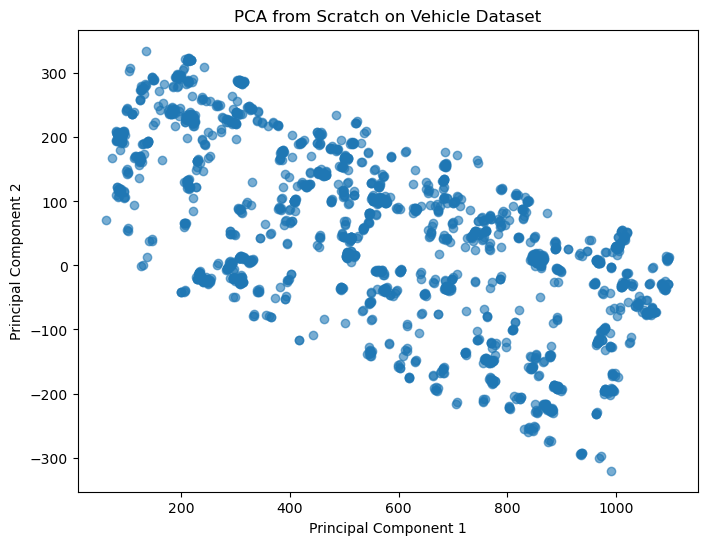

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA from Scratch on Vehicle Dataset")
plt.show()
